<a href="https://colab.research.google.com/github/hugoalexg/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/main/17_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K Means Clustering Project
For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

It is very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm. 
When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.

The Data
We will use a data frame with 777 observations on the following 18 variables.

Import the libraries you usually use for data analysis.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
sns.set()

Import the libraries you usually use for data analysis.

In [5]:
df = pd.read_csv('/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/College_Data', index_col=0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.

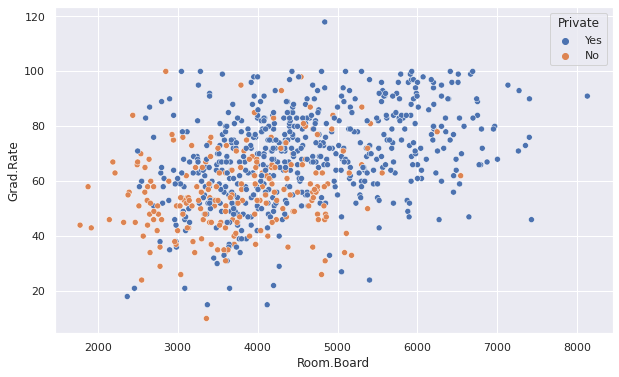

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "Room.Board", y = "Grad.Rate", hue = "Private", data = df)
plt.show()

Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column

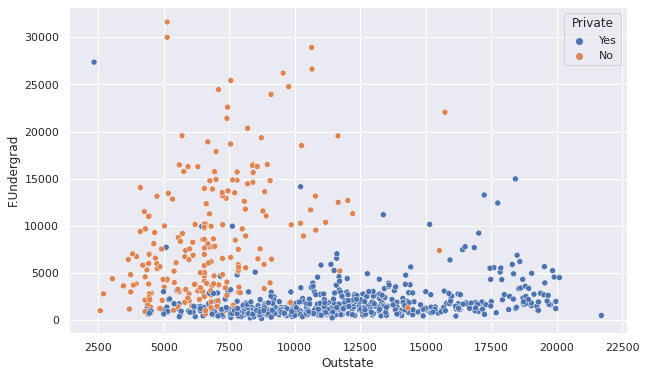

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "Outstate", y = "F.Undergrad", hue = "Private", data = df)
plt.show()

Create a stacked histogram showing Out of State Tuition based on the Private column.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


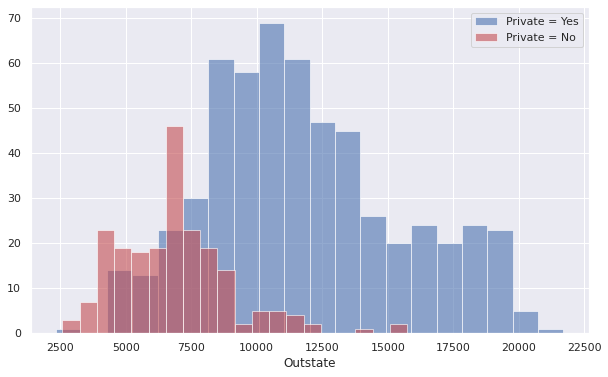

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['Private'] == 'Yes']['Outstate'], kde=False, bins=20, color='b',hist_kws={'alpha': 0.6})
sns.distplot(df[df['Private'] == 'No']['Outstate'], kde=False, bins=20, color='r',hist_kws={'alpha': 0.6})
plt.legend(['Private = Yes', 'Private = No'])
plt.show()

Create a similar histogram for the Grad.Rate column

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


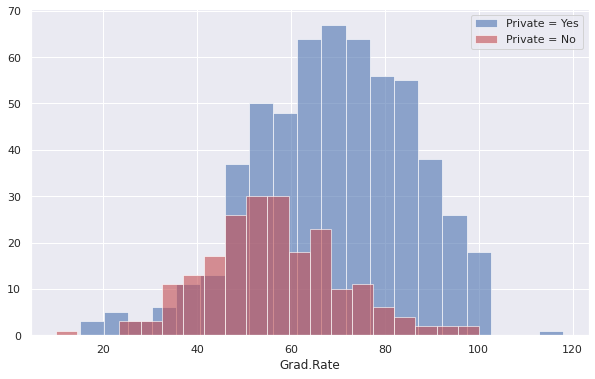

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['Private'] == 'Yes']['Grad.Rate'], kde=False, bins=20, color='b',hist_kws={'alpha': 0.6})
sns.distplot(df[df['Private'] == 'No']['Grad.Rate'], kde=False, bins=20, color='r',hist_kws={'alpha': 0.6})
plt.legend(['Private = Yes', 'Private = No'])
plt.show()

Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?

In [11]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Set that school's graduation rate to 100 so it makes sense.

In [12]:
df['Grad.Rate']['Cazenovia College'] = 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


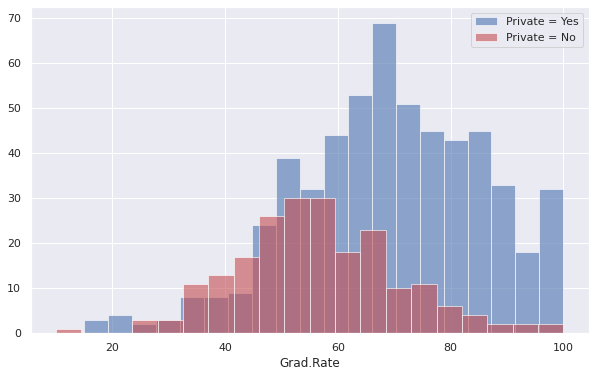

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(df[(df['Private'] == 'Yes') & (df['Grad.Rate'] <= 100)]['Grad.Rate'], kde=False, bins=20, color='b',hist_kws={'alpha': 0.6})
sns.distplot(df[(df['Private'] == 'No') & (df['Grad.Rate'] <= 100)]['Grad.Rate'], kde=False, bins=20, color='r',hist_kws={'alpha': 0.6})
plt.legend(['Private = Yes', 'Private = No'])
plt.show()

Now it is time to create the Cluster labels!

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

What are the cluster center vectors?

In [15]:
print(kmeans.cluster_centers_)
#print(kmeans.labels_)

[[1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]
 [1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.50926756e+01]]


Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.

In [16]:
def is_private(info):
  if info == 'Yes':
    return 1
  else:
    return 0

In [17]:
df['Cluster'] = df['Private'].apply(is_private)

Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(df['Cluster'], kmeans.labels_))
print(confusion_matrix(df['Cluster'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

[[ 74 138]
 [ 34 531]]


In [19]:
df['Cluster'].value_counts()

1    565
0    212
Name: Cluster, dtype: int64